# Predicting the Average Daily Return (ADR) for a Hotel

# Using Linear Regression, Neural Networks, and Decision Trees

### By Smita G

## Data Cleaning and Preprocessing

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the files, there are two files: H1 (Resort) & H2(City Hotel)
#Both hotels share same structure, so H1 will be used as train and H2 for test due to data size and for convenience.
train = pd.read_csv('../downloads/H1.csv')
test = pd.read_csv('../downloads/H2.csv')

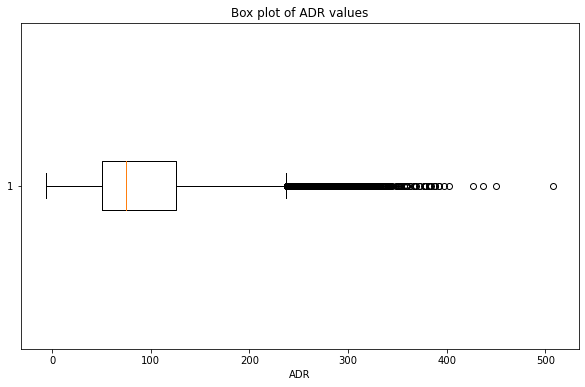

In [3]:
# Create a box plot of ADR values to better understand it
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(train['ADR'], vert=False)
ax.set_title('Box plot of ADR values')
ax.set_xlabel('ADR')
plt.show()

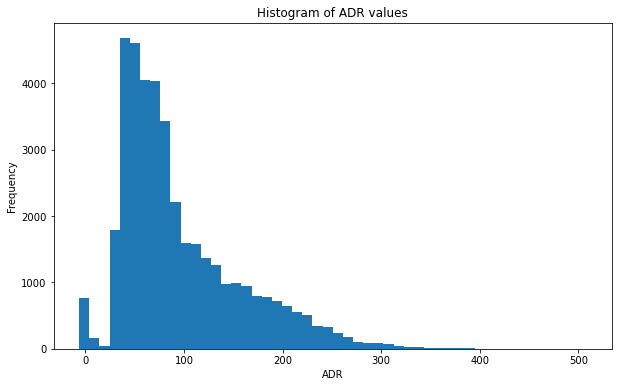

In [4]:
#Creating a hisrogram of the ADR values
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(train['ADR'], bins=50)
ax.set_title('Histogram of ADR values')
ax.set_xlabel('ADR')
ax.set_ylabel('Frequency')
plt.show()

In [5]:
#Interquartile Range for dealing with Outliers
Q1 = train['ADR'].quantile(0.25)
Q3 = train['ADR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

train = train[(train['ADR'] >= lower_bound) & (train['ADR'] <= upper_bound)]

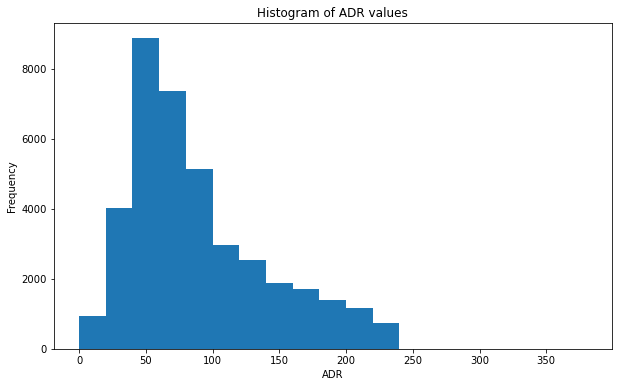

In [6]:
#Recreating boxplot to see changes after outliers have been taken care of.
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(train['ADR'], bins=np.arange(0, 400, 20))
ax.set_title('Histogram of ADR values')
ax.set_xlabel('ADR')
ax.set_ylabel('Frequency')
plt.show()

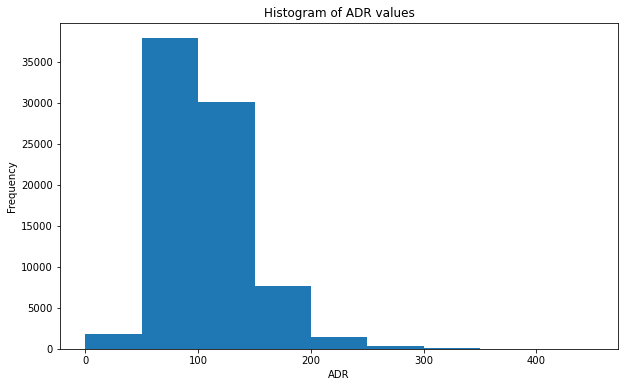

In [7]:
# ADR in the test set have already been checked for outliers
# Here's a histogram with bins with a step size of 50 and values between 0 and 600 since all the values were in that range.
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(test['ADR'], bins=np.arange(0, 500, 50))
ax.set_title('Histogram of ADR values')
ax.set_xlabel('ADR')
ax.set_ylabel('Frequency')
plt.show()

In [8]:
#Percentage of null values in train set
round(train.isnull().mean()*100,2)

IsCanceled                     0.00
LeadTime                       0.00
ArrivalDateYear                0.00
ArrivalDateMonth               0.00
ArrivalDateWeekNumber          0.00
ArrivalDateDayOfMonth          0.00
StaysInWeekendNights           0.00
StaysInWeekNights              0.00
Adults                         0.00
Children                       0.00
Babies                         0.00
Meal                           0.00
Country                        1.19
MarketSegment                  0.00
DistributionChannel            0.00
IsRepeatedGuest                0.00
PreviousCancellations          0.00
PreviousBookingsNotCanceled    0.00
ReservedRoomType               0.00
AssignedRoomType               0.00
BookingChanges                 0.00
DepositType                    0.00
Agent                          0.00
Company                        0.00
DaysInWaitingList              0.00
CustomerType                   0.00
ADR                            0.00
RequiredCarParkingSpaces    

In [9]:
#Percentage of null values in train set
round(test.isnull().mean()*100,2)

IsCanceled                     0.00
LeadTime                       0.00
ArrivalDateYear                0.00
ArrivalDateMonth               0.00
ArrivalDateWeekNumber          0.00
ArrivalDateDayOfMonth          0.00
StaysInWeekendNights           0.00
StaysInWeekNights              0.00
Adults                         0.00
Children                       0.01
Babies                         0.00
Meal                           0.00
Country                        0.03
MarketSegment                  0.00
DistributionChannel            0.00
IsRepeatedGuest                0.00
PreviousCancellations          0.00
PreviousBookingsNotCanceled    0.00
ReservedRoomType               0.00
AssignedRoomType               0.00
BookingChanges                 0.00
DepositType                    0.00
Agent                          0.00
Company                        0.00
DaysInWaitingList              0.00
CustomerType                   0.00
ADR                            0.00
RequiredCarParkingSpaces    

In [10]:
train.isna().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        461
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

In [11]:
test.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [12]:
#Identifying the country that most of the hotel customers are from
mode_country = train['Country'].mode()[0]
print(mode_country)

PRT


In [13]:
#Filling null values in country column with the mode
train['Country'].fillna('PRT', inplace= True)
test['Country'].fillna('PRT', inplace= True)

In [14]:
#Dropping columns due to large number being nans
train.drop(['ReservationStatusDate', 'Company'], axis=1, inplace=True)
test.drop(['ReservationStatusDate', 'Company'], axis=1, inplace=True)

In [15]:
#Children column is an integer in the train set but in float in the test set as found using train.dtypes and test.dtypes.
#Converting the column to integer because it makes no sense for it to be float.
test['Children'].fillna(value=0, inplace= True)
train['Children'].fillna(value=0, inplace= True)

In [16]:
train['Agent'] = train['Agent'].replace('       NULL', np.nan)
train['Agent'] = train['Agent'].astype('float').astype('Int64')
train['Agent'].fillna(value=0, inplace=True)

test['Agent'] = test['Agent'].replace('       NULL', np.nan)
test['Agent'] = test['Agent'].astype('float').astype('Int64')
test['Agent'].fillna(value=0, inplace=True)

In [17]:
train = pd.get_dummies(train, columns=['CustomerType', 'ReservationStatus', 'ArrivalDateMonth', 'MarketSegment', 'Country', 'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Meal'], drop_first=True)
train['Babies'] = train['Babies'].astype(np.int16)
train['ArrivalDateWeekNumber'] = train['ArrivalDateWeekNumber'].astype(np.int16)
train['Children'] = train['Children'].astype(np.int16)

In [18]:
test = pd.get_dummies(test, columns=['CustomerType', 'ReservationStatus', 'ArrivalDateMonth', 'MarketSegment','Country', 'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Meal'], drop_first=True)
test['Babies'] = test['Babies'].astype(np.int16)
test['ArrivalDateWeekNumber'] = test['ArrivalDateWeekNumber'].astype(np.int16)
test['Children'] = test['Children'].astype(np.int16)

In [19]:
# Drop any extra columns that are present in one of the datasets but not the other
extra_cols_train = set(train.columns) - set(test.columns)
extra_cols_test = set(test.columns) - set(train.columns)
train = train.drop(columns=extra_cols_train)
test = test.drop(columns=extra_cols_test)

# Make sure the feature order is the same in both datasets
test = test[train.columns]

In [20]:
#train.applymap(lambda x: x.strip() if isinstance(x, str) else x)
#test.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#Define variables
#variables = ['IsCanceled','LeadTime','ArrivalDateYear','ArrivalDateMonth',
  ''''''    'ArrivalDateDayOfMonth', 'Children',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
     'Meal', 'MarketSegment', 'DistributionChannel',
      'IsRepeatedGuest', 'PreviousCancellations',
     'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
     'BookingChanges', 'DepositType', 'Agent',
     'DaysInWaitingList', 'CustomerType', 'RequiredCarParkingSpaces',
    'TotalOfSpecialRequests', 'ReservationStatus','Country','Babies', 'ArrivalDateWeekNumber']''''''

In [21]:
# Preparing data
x_train = train.drop("ADR", axis=1)
y_train = train['ADR']
x_test = test.drop("ADR", axis=1)
y_test = test['ADR']

In [22]:
# Scaling data
scaler = preprocessing.MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
# Split data into training and validation sets
x_train_final, x_val_final, y_train_final, y_val_final = train_test_split(x_train_scaled, y_train, train_size=0.8)

## Linear Regression Model

In [24]:
# Training a Linear Regression model
lrmodel = LinearRegression()
lrmodel.fit(x_train_final, y_train_final)

LinearRegression()

### Running on Validation Data

In [25]:
# Using the model on validation data
lrval_pred = lrmodel.predict(x_val_final)
lrval_mse = mean_squared_error(y_val_final, lrval_pred)
print(f"Validation MSE: {lrval_mse}")

Validation MSE: 3.4255897396560435e+22


### Running on Test Data

In [26]:
# Testing model on test data
lrtest_pred = lrmodel.predict(x_test_scaled)
lrtest_mae = mean_absolute_error(y_test, lrtest_pred)
lrtest_mse = mean_squared_error(y_test, lrtest_pred)
lrtest_rmse = math.sqrt(lrtest_mse)

print(f"Test MAE: {lrtest_mae}")
print(f"Test MSE: {lrtest_mse}")
print(f"Test RMSE: {lrtest_rmse}")

Test MAE: 2325786806.008694
Test MSE: 1.3289316280388752e+22
Test RMSE: 115279296842.01215


Given the very poor performance of the current model, let's explore alternative approaches such as neural networks and decision trees, which offer greater flexibility in modeling non-linear relationships.

## Neural Networks

In [27]:
#Below is the model architecture that yielded the best results after testing with different layers and neurons.
nnmodel = keras.models.Sequential([
    keras.layers.Dense(173, activation='relu', input_shape=(173,)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='linear'),
])

In [28]:
#Specifying loss function, optimizer and evaluation metrics
nnmodel.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [29]:
#Training the neural network model using the best hyperparameters identified during hyperparameter tuning
nnhist = nnmodel.fit(x_train_final, y_train_final,      
                batch_size=32, epochs=8, validation_data=(x_val_final, y_val_final))

Epoch 1/8
968/968 [==============================] - 2s 2ms/step - loss: 1367.5160 - mse: 1367.5160 - mae: 24.0579 - val_loss: 615.5952 - val_mse: 615.5952 - val_mae: 16.4747
Epoch 2/8
968/968 [==============================] - 2s 2ms/step - loss: 601.2349 - mse: 601.2349 - mae: 16.2669 - val_loss: 569.8556 - val_mse: 569.8556 - val_mae: 15.8960
Epoch 3/8
968/968 [==============================] - 2s 2ms/step - loss: 555.4381 - mse: 555.4381 - mae: 15.5204 - val_loss: 514.9890 - val_mse: 514.9890 - val_mae: 15.2156
Epoch 4/8
968/968 [==============================] - 2s 2ms/step - loss: 515.1344 - mse: 515.1344 - mae: 14.8458 - val_loss: 478.7000 - val_mse: 478.7000 - val_mae: 14.5392
Epoch 5/8
968/968 [==============================] - 1s 2ms/step - loss: 490.5812 - mse: 490.5812 - mae: 14.4505 - val_loss: 494.6246 - val_mse: 494.6246 - val_mae: 15.1885
Epoch 6/8
968/968 [==============================] - 2s 2ms/step - loss: 471.5157 - mse: 471.5157 - mae: 14.1257 - val_loss: 446.6940

### Running on Validation Data

In [30]:
# Get predictions on the validation set
nnval_pred = nnmodel.predict(x_val_final)

In [31]:
# Calculate evaluation metrics and mean values
nnvalmean = np.mean(y_val_final)
nnvalmean_predictions = np.mean(nnval_pred)

nnval_mae = mean_absolute_error(y_val_final, nnval_pred)
nnval_mse = mean_squared_error(y_val_final, nnval_pred)
nnval_rmse = math.sqrt(nnval_mse)

# Print evaluation metrics and mean values
print('VAL Mean ADR in val set:', nnvalmean)
print('VAL Mean predicted ADR in val set:', nnvalmean_predictions)
print('VAL MAE:', nnval_mae)
print('VAL MSE:', nnval_mse)
print('VAL RMSE:', nnval_rmse)

VAL Mean ADR in val set: 88.47382102272731
VAL Mean predicted ADR in val set: 89.92647
VAL MAE: 13.835221111515828
VAL MSE: 429.94892573159507
VAL RMSE: 20.735209806789875


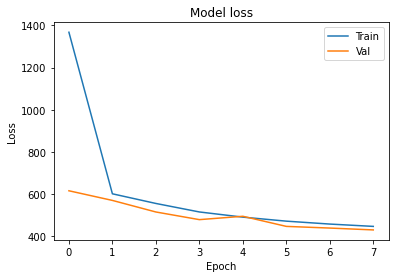

In [32]:
# Plot the model loss
plt.plot(nnhist.history['loss'])
plt.plot(nnhist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Running on Test Data

In [33]:
# Get predictions on test set
nntest_pred = nnmodel.predict(x_test_scaled)

# Calculate mean values of y_test and predictions
nntestmean = np.mean(y_test)
nntestmean_pred = np.mean(nntest_pred)

In [34]:
# Calculate evaluation metrics
nntest_mae = mean_absolute_error(y_test, nntest_pred)
nntest_mse = mean_squared_error(y_test, nntest_pred)
nntest_rmse = math.sqrt(nntest_mse)

# Print evaluation metrics and mean values
print('TEST Mean ADR in test set:', nntestmean)
print('TEST Mean predicted ADR in test set:', nntestmean_pred)
print('TEST MAE:', nntest_mae)
print('TEST MSE:', nntest_mse)
print('TEST RMSE:', nntest_rmse)

TEST Mean ADR in test set: 105.3044653977023
TEST Mean predicted ADR in test set: 72.758896
TEST MAE: 49.357732823005946
TEST MSE: 3789.8934008445403
TEST RMSE: 61.562110107147404


## Decision Tree

In [35]:
# Hyperparameters to search to find best for decision tree
param_dist = {'max_depth': range(1, 21),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

In [36]:
#Build Decision Tree Model
dectreemodel = DecisionTreeRegressor()

In [37]:
#Randomize search object
rsearchobj = RandomizedSearchCV(dectreemodel, param_distributions=param_dist,
                             n_iter=100, cv=5, scoring='neg_mean_squared_error',
                             random_state=42)

In [38]:
#Fit to data
rsearchobj.fit(x_train_final, y_train_final)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'max_depth': range(1, 21),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='neg_mean_squared_error')

In [39]:
# Fit the best model to the data
dtrbestmodel = rsearchobj.best_estimator_
dtrbestmodel.fit(x_train_final, y_train_final)

DecisionTreeRegressor(max_depth=19, min_samples_leaf=4, min_samples_split=5)

### Running on Validation Data

In [40]:
# Run on validation data
dtrval_pred = dtrbestmodel.predict(x_val_final)

In [41]:
# Calculate evaluation metrics and mean values
dtrval_mae = mean_absolute_error(y_val_final, dtrval_pred)
dtrval_mse = mean_squared_error(y_val_final, dtrval_pred)
dtrval_rmse = math.sqrt(dtrval_mse)

# Print evaluation metrics
print('VAL MAE:', dtrval_mae)
print('VAL MSE:', dtrval_mse)
print('VAL RMSE:', dtrval_rmse)

VAL MAE: 13.292678884089064
VAL MSE: 496.9137089358462
VAL RMSE: 22.291561383982195


### Running on test data

In [42]:
# Get predictions on test set
dtrtest_pred = dtrbestmodel.predict(x_test_scaled)

In [43]:
# Calculate evaluation metrics
dtrtest_mae = mean_absolute_error(y_test, dtrtest_pred)
dtrtest_mse = mean_squared_error(y_test, dtrtest_pred)
dtrtest_rmse = math.sqrt(dtrtest_mse)

# Print evaluation metrics
print('TEST MAE:', dtrtest_mae)
print('TEST MSE:', dtrtest_mse)
print('TEST RMSE:', dtrtest_rmse)

TEST MAE: 47.33277076649017
TEST MSE: 3529.273034544993
TEST RMSE: 59.40768497883917


### References

#### Dataset
<a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191"> Hotel Booking Demand Dataset</a>